In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
import os
import sys

CURRENT_DIR = os.path.abspath(os.path.dirname(__name__))
LIBRARY_DIR = os.path.join(CURRENT_DIR, '..', '..')

sys.path.append(LIBRARY_DIR)

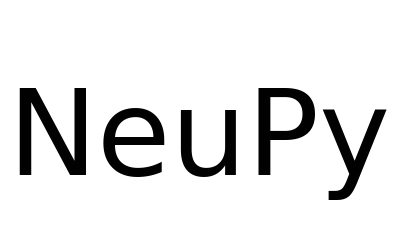

In [3]:
ax = plt.gca()
ax.patch.set_facecolor('#ffffff')
ax.text(0, 0.25, 'NeuPy', fontsize=120)

plt.xticks([])
plt.yticks([])

plt.savefig('neupy-text.png', facecolor='#ffffff', bbox_inches='tight')

/Users/itdxer/.pyenv/versions/3.6.0/envs/neupy36/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


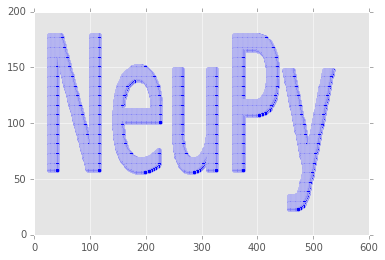

In [11]:
import numpy as np
from scipy.misc import imread

neupy_text = imread('neupy-text.png') 
# Encode black pixels as 1 and white pixels as 0
neupy_text = (1 - neupy_text / 255.).round().max(axis=2)

data = []
for (x, y), value in np.ndenumerate(neupy_text):
    if value == 1:
        data.append([y, -x + 300])
        
data = np.array(data)
plt.scatter(*data.T)
plt.show()

Iteration #1


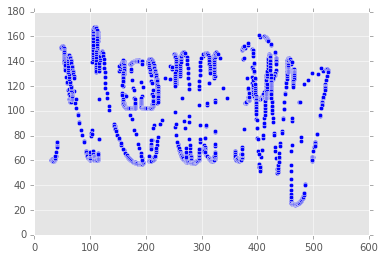

Iteration #2


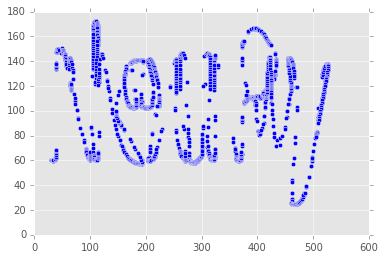

Iteration #3


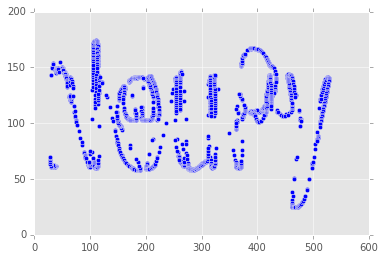

Iteration #4


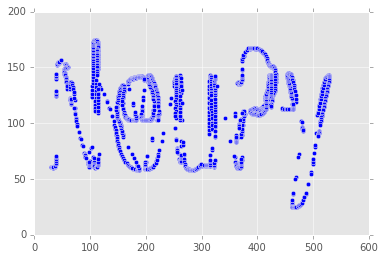

Iteration #5


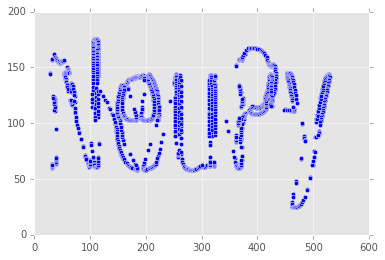

Iteration #6


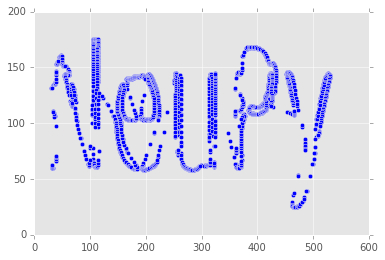

Iteration #7


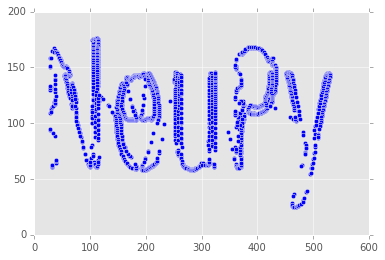

Iteration #8


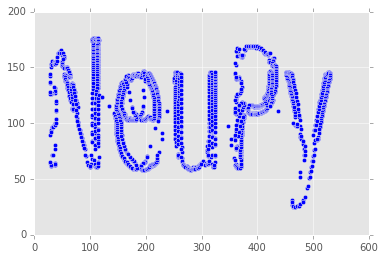

Iteration #9


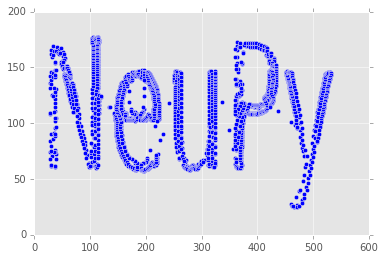

Iteration #10


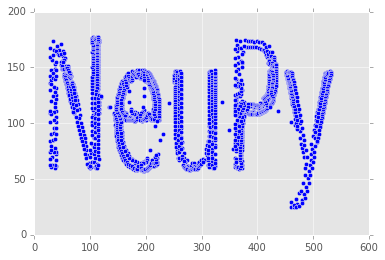

Iteration #11


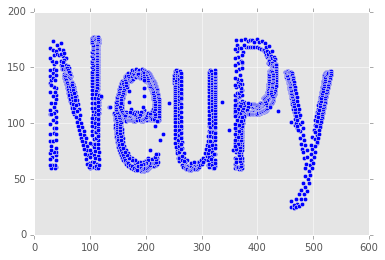

Iteration #12


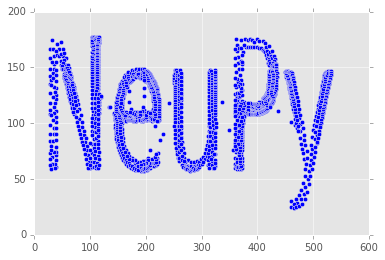

Iteration #13


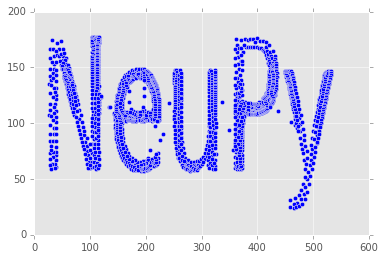

Iteration #14


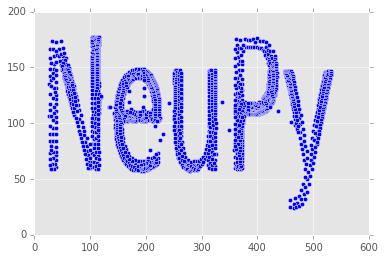

Iteration #15


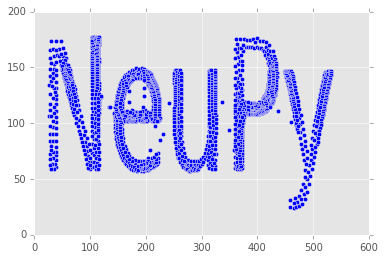

Iteration #16


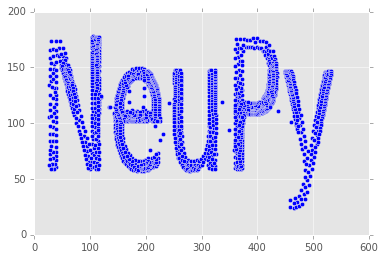

Iteration #17


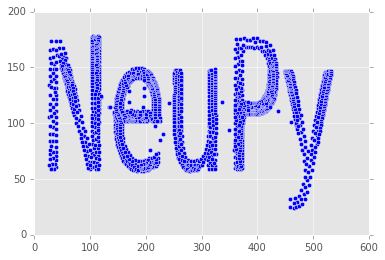

Iteration #18


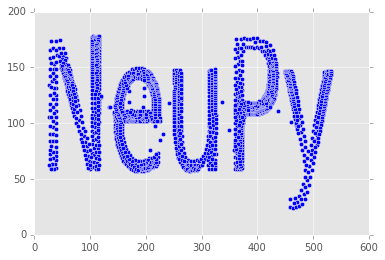

Iteration #19


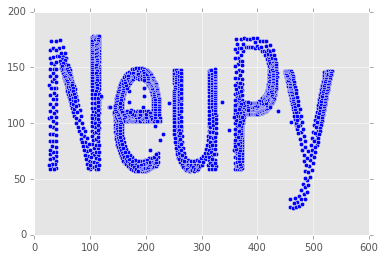

Iteration #20


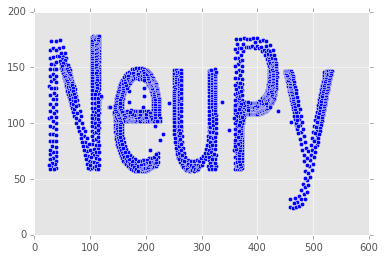

Iteration #21


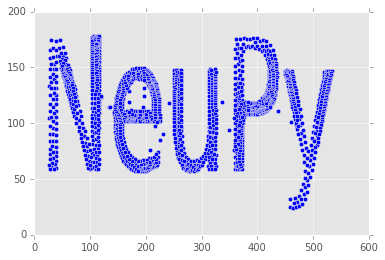

Iteration #22


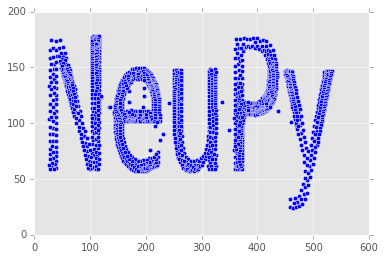

Iteration #23


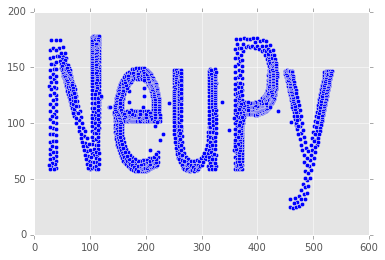

Iteration #24


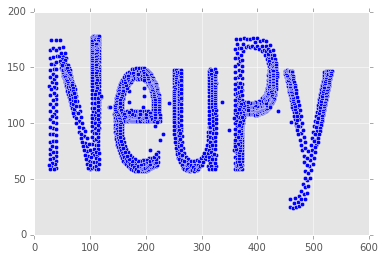

Iteration #25


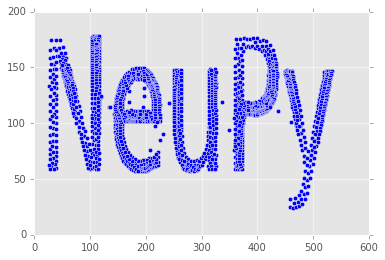

Iteration #26


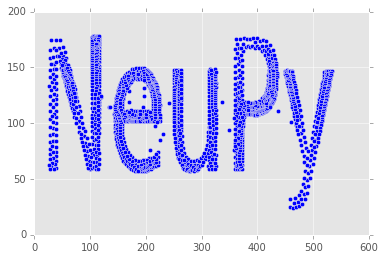

Iteration #27


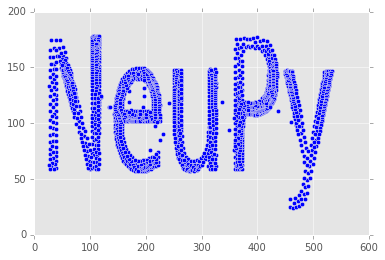

Iteration #28


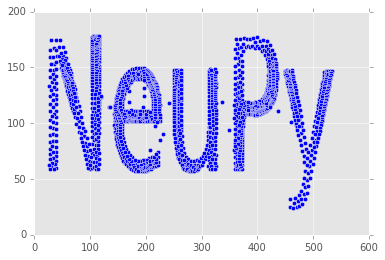

Iteration #29


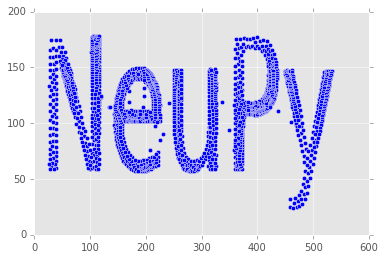

Iteration #30


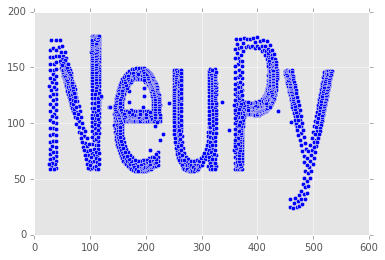

In [14]:
from neupy import init, algorithms, environment

environment.reproducible()

n = 1000
weight = np.zeros((2, n))
weight[0, :] = np.linspace(25, 500, n)
weight[1, :] = (np.sin(np.linspace(0, 100, n)) + 1) * 50 + 50
weight = np.concatenate([weight, weight], axis=1)

sofm = algorithms.SOFM(
    n_inputs=2,
    features_grid=(2, n),
    weight=weight,
    
    step=0.05,
    learning_radius=10,
    
    reduce_radius_after=1,
    reduce_step_after=10)

for i in range(30):
    print("Iteration #{}".format(i + 1))
    sofm.train(data, epochs=1)
    plt.scatter(*sofm.weight)
    plt.show()

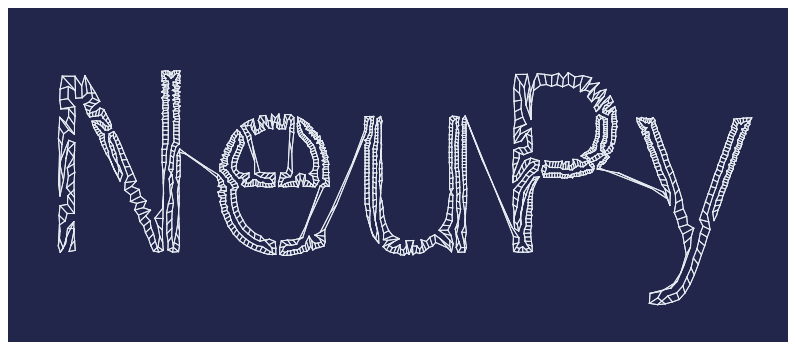

In [15]:
from examples.competitive.utils import plot_2d_grid

bgcolor = '#22264b'

fig = plt.figure(figsize=(14, 6))
plt.gca().patch.set_facecolor(bgcolor)
plot_2d_grid(np.transpose(sofm.weight.T.reshape((2, n, 2)), (2, 0, 1)), color='#e8edf3')

plt.xticks([])
plt.yticks([])

plt.ylim(0, 220)
plt.xlim(-10, 560)

plt.show()